In [1]:
import pandas as pd
import numpy as np

import time

from tabulate import tabulate

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
# Load the dataset
file_path = 'data_cleaned.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(tabulate(data.head(), headers='keys', tablefmt='rounded_grid', showindex="always"))

╭────┬──────────┬────────────────────┬────────────────────────┬────────────┬───────────────────┬────────────────────┬────────────────────────┬──────────────────┬───────┬─────────────────────╮
│    │   Income │ Living_Standards   │ Homeownership_Status   │ Location   │   Work_Experience │ Type_of_Housing    │   Number_of_Dependents │   Household_Size │   Age │ Employment_Status   │
├────┼──────────┼────────────────────┼────────────────────────┼────────────┼───────────────────┼────────────────────┼────────────────────────┼──────────────────┼───────┼─────────────────────┤
│  0 │    72510 │ Medium             │ Own                    │ Urban      │                21 │ Apartment          │                      5 │                7 │    56 │ Full-time           │
├────┼──────────┼────────────────────┼────────────────────────┼────────────┼───────────────────┼────────────────────┼────────────────────────┼──────────────────┼───────┼─────────────────────┤
│  1 │    75462 │ Medium             │ O

In [3]:
data.dtypes

Income                   int64
Living_Standards        object
Homeownership_Status    object
Location                object
Work_Experience          int64
Type_of_Housing         object
Number_of_Dependents     int64
Household_Size           int64
Age                      int64
Employment_Status       object
dtype: object

In [4]:
data.select_dtypes(include=['object']).dtypes

Living_Standards        object
Homeownership_Status    object
Location                object
Type_of_Housing         object
Employment_Status       object
dtype: object

In [5]:
data.select_dtypes(include=['number']).dtypes

Income                  int64
Work_Experience         int64
Number_of_Dependents    int64
Household_Size          int64
Age                     int64
dtype: object

In [6]:
# Define features and target
X = data.drop('Income', axis=1)
y = data['Income']

In [7]:
# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [8]:
# Create preprocessing pipelines for numerical and categorical data
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines into a single ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [9]:
# Fit and transform the entire dataset
X_processed = preprocessor.fit_transform(X)

In [10]:
# Split the data after preprocessing
X_train, X_temp, y_train, y_temp = train_test_split(X_processed, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [11]:
# Display shapes of the datasets
data_shapes = [
    ["Dataset", "Shape"],
    ["X_train", X_train.shape],
    ["y_train", y_train.shape],
    ["X_val", X_val.shape],
    ["y_val", y_val.shape],
    ["X_test", X_test.shape],
    ["y_test", y_test.shape]
]

In [12]:
# Print the table
print(tabulate(data_shapes, headers="firstrow", tablefmt="grid"))

+-----------+------------+
| Dataset   | Shape      |
+===========+============+
| X_train   | (7000, 18) |
+-----------+------------+
| y_train   | (7000,)    |
+-----------+------------+
| X_val     | (1500, 18) |
+-----------+------------+
| y_val     | (1500,)    |
+-----------+------------+
| X_test    | (1500, 18) |
+-----------+------------+
| y_test    | (1500,)    |
+-----------+------------+


In [13]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(random_state=6112024),
    'Gradient Boosting': GradientBoostingRegressor(random_state=6112024),
    'Support Vector Regressor': SVR(),
    'XGBoost': XGBRegressor(random_state=6112024),
    'MLP Regressor': MLPRegressor(random_state=6112024),
    'Decision Tree': DecisionTreeRegressor(random_state=6112024),
    'AdaBoost': AdaBoostRegressor(random_state=6112024),
    'Bagging': BaggingRegressor(random_state=6112024),
    'Kernel Ridge': KernelRidge(),
    'Gaussian Process': GaussianProcessRegressor(),
    'KNeighbors': KNeighborsRegressor(),
    'Hist Gradient Boosting': HistGradientBoostingRegressor(random_state=6112024)
}

In [14]:
models

{'Linear Regression': LinearRegression(),
 'Ridge': Ridge(),
 'Lasso': Lasso(),
 'ElasticNet': ElasticNet(),
 'Random Forest': RandomForestRegressor(random_state=6112024),
 'Gradient Boosting': GradientBoostingRegressor(random_state=6112024),
 'Support Vector Regressor': SVR(),
 'XGBoost': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              

In [15]:
# Define parameter grids for Hyperparameter Tuning
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    },
    'MLP Regressor': {
        'hidden_layer_sizes': [(50, 50), (100, 50), (100, 100)],
        'activation': ['relu', 'tanh'],
        'learning_rate': ['constant', 'adaptive']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    'Bagging': {
        'n_estimators': [10, 50, 100],
        'max_samples': [0.5, 0.75, 1.0],
        'max_features': [0.5, 0.75, 1.0]
    },
    'Kernel Ridge': {
        'alpha': [0.1, 1.0, 10.0],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': [0.01, 0.1, 1.0, None]
    },
    'Gaussian Process': {
        'alpha': [1e-10, 1e-2, 1.0],
        'n_restarts_optimizer': [0, 1, 2]
    },
    'KNeighbors': {
        'n_neighbors': [3, 5, 10],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    'Hist Gradient Boosting': {
        'learning_rate': [0.01, 0.1, 0.2],
        'max_iter': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_leaf': [20, 50, 100]
    }
}

In [16]:
param_grids

{'Random Forest': {'n_estimators': [100, 200, 300],
  'max_depth': [None, 10, 20],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4]},
 'Gradient Boosting': {'n_estimators': [100, 200, 300],
  'learning_rate': [0.01, 0.1, 0.2],
  'max_depth': [3, 4, 5]},
 'XGBoost': {'n_estimators': [100, 200, 300],
  'learning_rate': [0.01, 0.1, 0.2],
  'max_depth': [3, 4, 5]},
 'MLP Regressor': {'hidden_layer_sizes': [(50, 50), (100, 50), (100, 100)],
  'activation': ['relu', 'tanh'],
  'learning_rate': ['constant', 'adaptive']},
 'Decision Tree': {'max_depth': [None, 10, 20, 30],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4]},
 'AdaBoost': {'n_estimators': [50, 100, 200],
  'learning_rate': [0.01, 0.1, 1.0]},
 'Bagging': {'n_estimators': [10, 50, 100],
  'max_samples': [0.5, 0.75, 1.0],
  'max_features': [0.5, 0.75, 1.0]},
 'Kernel Ridge': {'alpha': [0.1, 1.0, 10.0],
  'kernel': ['linear', 'rbf', 'poly'],
  'gamma': [0.01, 0.1, 1.0, None]},
 'Gaussian Process': 

In [17]:
# Train models and evaluate on the validation set
metrics = {}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    y_val_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_val_pred, squared=False)
    mae = mean_absolute_error(y_val, y_val_pred)
    r2 = r2_score(y_val, y_val_pred)
    
    metrics[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R^2': r2,
        'Time': end_time - start_time
    }
    
    print(f'{name} RMSE: {rmse}, MAE: {mae}, R^2: {r2}, Time: {end_time - start_time} seconds')


Linear Regression RMSE: 1421805.000596929, MAE: 700435.144, R^2: 0.3808219188662052, Time: 0.0234067440032959 seconds
Ridge RMSE: 1422115.9274015334, MAE: 700693.4015169463, R^2: 0.38055107987964853, Time: 0.0039768218994140625 seconds


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.042e+14, tolerance: 2.300e+12
  model = cd_fast.enet_coordinate_descent(
d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\skl

Lasso RMSE: 1422117.386764992, MAE: 700766.4716201477, R^2: 0.3805498085324046, Time: 0.08365678787231445 seconds
ElasticNet RMSE: 1576838.0596081929, MAE: 891782.740982955, R^2: 0.2384302471698666, Time: 0.003001689910888672 seconds


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest RMSE: 1440476.9089240953, MAE: 643487.7328004445, R^2: 0.3644523737419034, Time: 1.7799646854400635 seconds


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gradient Boosting RMSE: 1432545.4943707378, MAE: 670473.8903209342, R^2: 0.3714318874035478, Time: 0.42835021018981934 seconds


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Support Vector Regressor RMSE: 1953728.2826127806, MAE: 749743.4377660595, R^2: -0.16913275004985717, Time: 1.2795629501342773 seconds
XGBoost RMSE: 1526593.1839798242, MAE: 723253.7839128214, R^2: 0.2861907482147217, Time: 0.16739583015441895 seconds


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To ca

MLP Regressor RMSE: 1969380.9911662885, MAE: 783695.0531925955, R^2: -0.1879413038324973, Time: 7.047736644744873 seconds
Decision Tree RMSE: 1881648.0520668204, MAE: 774697.5853333334, R^2: -0.08445688335812251, Time: 0.022990942001342773 seconds
AdaBoost RMSE: 1543251.1685857992, MAE: 767133.6118635203, R^2: 0.27052782928170904, Time: 0.04200100898742676 seconds


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Bagging RMSE: 1455534.4126537899, MAE: 637632.6023555555, R^2: 0.35109599474345365, Time: 0.16727995872497559 seconds


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Kernel Ridge RMSE: 1422114.8160536634, MAE: 700679.824642529, R^2: 0.380552048046808, Time: 1.842287540435791 seconds


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gaussian Process RMSE: 3066434.133631407, MAE: 1561587.7889233583, R^2: -1.8800682559039297, Time: 3.5018486976623535 seconds
KNeighbors RMSE: 1513656.2423731536, MAE: 670295.4734666666, R^2: 0.2982377348383364, Time: 0.0005822181701660156 seconds
Hist Gradient Boosting RMSE: 1452380.9842592024, MAE: 652385.3959504527, R^2: 0.35390466166892187, Time: 0.23100042343139648 seconds


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [18]:
# Prepare data for tabulation
metrics_table = [["Model", "RMSE", "MAE", "R^2", "Time (seconds)"]]
for model_name, metric_values in metrics.items():
    metrics_table.append([
        model_name, 
        f"{metric_values['RMSE']:.3f}", 
        f"{metric_values['MAE']:.3f}", 
        f"{metric_values['R^2']:.3f}", 
        f"{metric_values['Time']:.4f}"
    ])

In [19]:
# Print the table
print(tabulate(metrics_table, headers="firstrow", tablefmt="grid"))

+--------------------------+-------------+------------------+--------+------------------+
| Model                    |        RMSE |              MAE |    R^2 |   Time (seconds) |
+==========================+=============+==================+========+==================+
| Linear Regression        | 1.42181e+06 | 700435           |  0.381 |           0.0234 |
+--------------------------+-------------+------------------+--------+------------------+
| Ridge                    | 1.42212e+06 | 700693           |  0.381 |           0.004  |
+--------------------------+-------------+------------------+--------+------------------+
| Lasso                    | 1.42212e+06 | 700766           |  0.381 |           0.0837 |
+--------------------------+-------------+------------------+--------+------------------+
| ElasticNet               | 1.57684e+06 | 891783           |  0.238 |           0.003  |
+--------------------------+-------------+------------------+--------+------------------+
| Random F

In [20]:
# Convert metrics dictionary to DataFrame for easier processing
metrics_df = pd.DataFrame(metrics).T

# Normalize the metrics using min-max scaling
scaler = MinMaxScaler()
normalized_metrics = scaler.fit_transform(metrics_df[['RMSE', 'MAE', 'R^2']])
normalized_df = pd.DataFrame(normalized_metrics, columns=['RMSE', 'MAE', 'R^2'], index=metrics_df.index)

# Assign weights to each metric
weights = {'RMSE': 0.4, 'MAE': 0.3, 'R^2': 0.3}

# Compute the weighted score for each model
normalized_df['Score'] = (
    weights['RMSE'] * (1 - normalized_df['RMSE']) +  # Lower RMSE is better, hence (1 - RMSE)
    weights['MAE'] * (1 - normalized_df['MAE']) +  # Lower MAE is better, hence (1 - MAE)
    weights['R^2'] * normalized_df['R^2']  # Higher R^2 is better
)

In [21]:
# Find the best model based on the highest score
best_model_name = normalized_df['Score'].idxmax()
best_model_metrics = metrics[best_model_name]
best_model_instance = models[best_model_name]

# Print the best model metrics
best_model_table = [
    ["Metric", "Value"],
    ["Best Model", best_model_name],
    ["RMSE", f"{best_model_metrics['RMSE']:.3f}"],
    ["MAE", f"{best_model_metrics['MAE']:.3f}"],
    ["R^2", f"{best_model_metrics['R^2']:.3f}"],
    ["Time (seconds)", f"{best_model_metrics['Time']:.4f}"]
]
print("\nBest Model Metrics:")
print(tabulate(best_model_table, headers="firstrow", tablefmt="grid"))


Best Model Metrics:
+----------------+---------------+
| Metric         | Value         |
+================+===============+
| Best Model     | Random Forest |
+----------------+---------------+
| RMSE           | 1440476.909   |
+----------------+---------------+
| MAE            | 643487.733    |
+----------------+---------------+
| R^2            | 0.364         |
+----------------+---------------+
| Time (seconds) | 1.7800        |
+----------------+---------------+


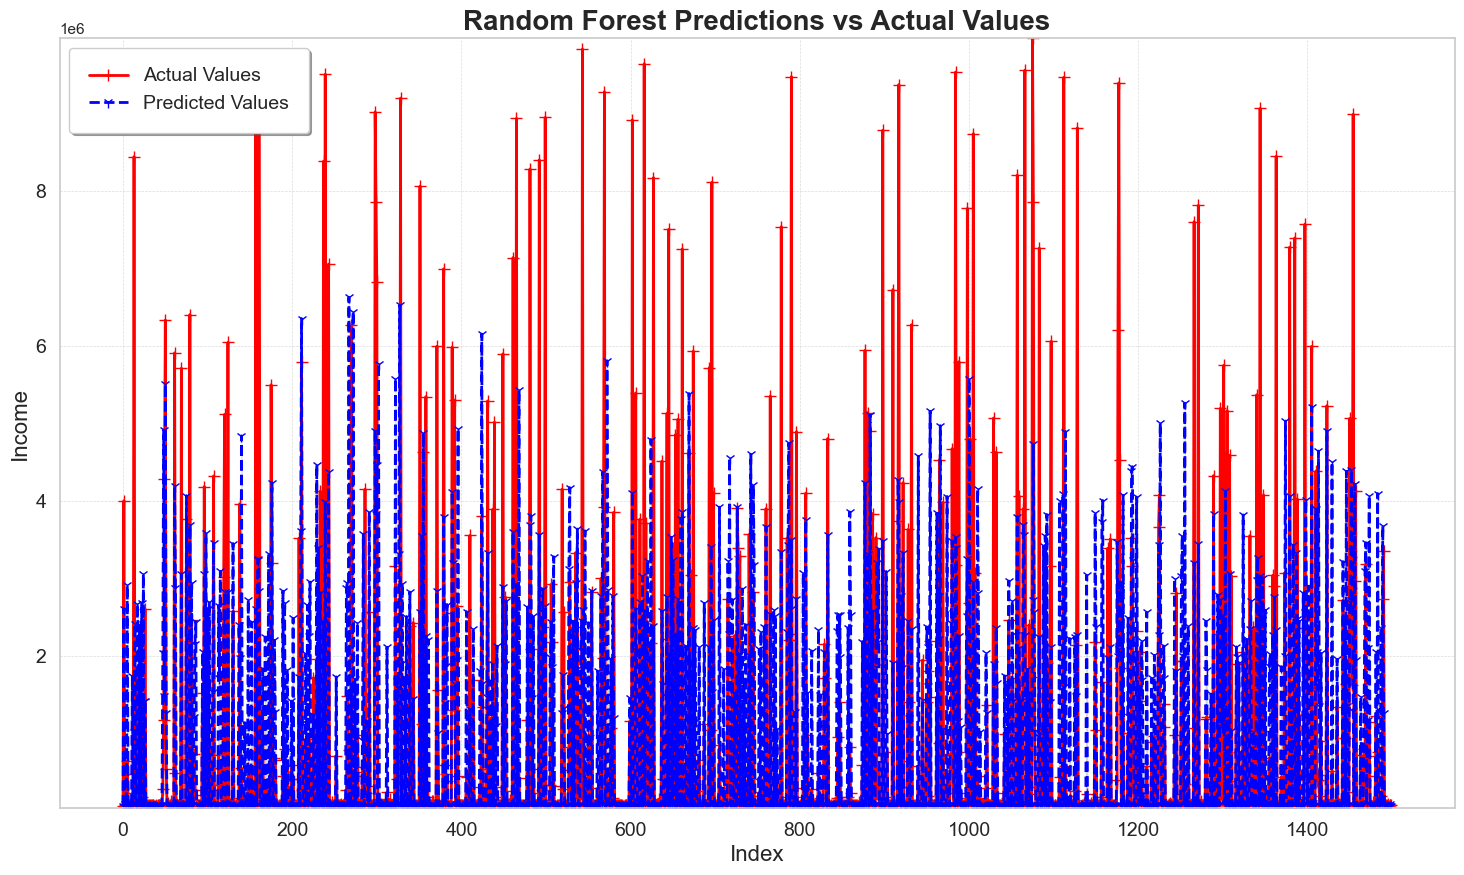

In [22]:
# Predict using the best model
y_test_pred = best_model_instance.predict(X_test)

# Set the theme using seaborn
sns.set_theme(style="whitegrid", palette="muted")

# Improved plot for the predictions vs actual values for the best model
plt.figure(figsize=(18, 10))

# Plot actual values
plt.plot(y_test.values, label='Actual Values', color='red', linestyle='-', marker='+', markersize=8, linewidth=2)

# Plot predicted values
plt.plot(y_test_pred, label='Predicted Values', color='blue', linestyle='--', marker='1', markersize=8, linewidth=2)

# Fill between for better visualization of the prediction range
plt.fill_between(range(len(y_test)), y_test, y_test_pred, color='gray', alpha=0.2)

# Set the y-axis limits based on the min and max of y_test and y_test_pred
y_min = min(min(y_test), min(y_test_pred))
y_max = max(max(y_test), max(y_test_pred))
plt.ylim(y_min - 1, y_max + 1)

plt.xlabel('Index', fontsize=16)
plt.ylabel('Income', fontsize=16)
plt.title(f'{best_model_name} Predictions vs Actual Values', fontsize=20, fontweight='bold')
plt.legend(fontsize=14, loc='upper left', frameon=True, shadow=True, fancybox=True, borderpad=1)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()


In [23]:
def perform_grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    return best_model, best_params, best_score

In [24]:
# Perform Grid Search CV for selected models
metrics_param = {}
best_models = {}

for model_name in param_grids.keys():
    print(f"\nTuning {model_name}...")
    model = models[model_name]
    param_grid = param_grids[model_name]
    start_time = time.time()
    best_model, best_params, best_score = perform_grid_search(model, param_grid, X_train, y_train)
    end_time = time.time()
    best_models[model_name] = best_model
    y_val_pred = best_model.predict(X_val)
    rmse = mean_squared_error(y_val, y_val_pred, squared=False)
    mae = mean_absolute_error(y_val, y_val_pred)
    r2 = r2_score(y_val, y_val_pred)
    metrics_param[f'{model_name} (Tuned)'] = {'RMSE': rmse, 'MAE': mae, 'R^2': r2, 'Time': end_time - start_time}
    print(f'Best parameters: {best_params}')
    print(f'Best score: {best_score}')
    print(f'{model_name} (Tuned) RMSE: {rmse}, MAE: {mae}, R^2: {r2}, Time: {end_time - start_time} seconds')



Tuning Random Forest...


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best score: 0.3804575425857818
Random Forest (Tuned) RMSE: 1416321.7533878575, MAE: 627730.0519527385, R^2: 0.38558847940392116, Time: 125.57205724716187 seconds

Tuning Gradient Boosting...


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best score: 0.3835018570097157
Gradient Boosting (Tuned) RMSE: 1418743.875215075, MAE: 649175.743995012, R^2: 0.3834852114761791, Time: 16.145741939544678 seconds

Tuning XGBoost...


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best score: 0.38342145681381223
XGBoost (Tuned) RMSE: 1419023.8643266833, MAE: 649247.5547135416, R^2: 0.38324183225631714, Time: 2.601646900177002 seconds

Tuning MLP Regressor...


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best parameters: {'activation': 'relu', 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant'}
Best score: 0.3681654528889703
MLP Regressor (Tuned) RMSE: 1422920.2121354695, MAE: 675739.7171590693, R^2: 0.37985021691368215, Time: 52.781129360198975 seconds

Tuning Decision Tree...


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score: 0.2012469124166419
Decision Tree (Tuned) RMSE: 1582807.2922590687, MAE: 676142.3808990843, R^2: 0.2326533805025247, Time: 0.7196218967437744 seconds

Tuning AdaBoost...


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Best score: 0.38310649538464997
AdaBoost (Tuned) RMSE: 1423947.5540488104, MAE: 652322.7552817567, R^2: 0.3789544030050106, Time: 2.420758008956909 seconds

Tuning Bagging...


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best parameters: {'max_features': 0.75, 'max_samples': 0.5, 'n_estimators': 100}
Best score: 0.3722596959241874
Bagging (Tuned) RMSE: 1418687.9119081353, MAE: 674896.4804510821, R^2: 0.383533848198373, Time: 10.384322166442871 seconds

Tuning Kernel Ridge...


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best parameters: {'alpha': 1.0, 'gamma': None, 'kernel': 'rbf'}
Best score: 0.3830787848300582
Kernel Ridge (Tuned) RMSE: 1425837.728856405, MAE: 704566.3263966937, R^2: 0.3773045334479086, Time: 92.62976050376892 seconds

Tuning Gaussian Process...


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best parameters: {'alpha': 1.0, 'n_restarts_optimizer': 0}
Best score: 0.33773990499157364
Gaussian Process (Tuned) RMSE: 1477338.9630822416, MAE: 699510.9808378296, R^2: 0.3315086327728519, Time: 60.42977547645569 seconds

Tuning KNeighbors...


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best parameters: {'algorithm': 'ball_tree', 'n_neighbors': 10, 'weights': 'uniform'}
Best score: 0.3467397829091313
KNeighbors (Tuned) RMSE: 1487731.3818746442, MAE: 679446.2411333334, R^2: 0.322070477017938, Time: 1.073913335800171 seconds

Tuning Hist Gradient Boosting...
Best parameters: {'learning_rate': 0.01, 'max_depth': None, 'max_iter': 300, 'min_samples_leaf': 100}
Best score: 0.39147991978031166
Hist Gradient Boosting (Tuned) RMSE: 1416369.862814123, MAE: 645627.7615434831, R^2: 0.3855467381997012, Time: 22.878976821899414 seconds


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [25]:
# Prepare data for tabulation
metrics_table_param = [["Model", "RMSE", "MAE", "R^2", "Time (seconds)"]]
for model_name, metric_values in metrics_param.items():
    metrics_table_param.append([
        model_name, 
        f"{metric_values['RMSE']:.2f}", 
        f"{metric_values['MAE']:.2f}", 
        f"{metric_values['R^2']:.6f}", 
        f"{metric_values['Time']:.6f}"
    ])

In [26]:
# Print the table
print(tabulate(metrics_table_param, headers="firstrow", tablefmt="grid"))

+--------------------------------+-------------+--------+----------+------------------+
| Model                          |        RMSE |    MAE |      R^2 |   Time (seconds) |
+================================+=============+========+==========+==================+
| Random Forest (Tuned)          | 1.41632e+06 | 627730 | 0.385588 |       125.572    |
+--------------------------------+-------------+--------+----------+------------------+
| Gradient Boosting (Tuned)      | 1.41874e+06 | 649176 | 0.383485 |        16.1457   |
+--------------------------------+-------------+--------+----------+------------------+
| XGBoost (Tuned)                | 1.41902e+06 | 649248 | 0.383242 |         2.60165  |
+--------------------------------+-------------+--------+----------+------------------+
| MLP Regressor (Tuned)          | 1.42292e+06 | 675740 | 0.37985  |        52.7811   |
+--------------------------------+-------------+--------+----------+------------------+
| Decision Tree (Tuned)         

In [27]:
# Normalize the metrics for models with hyperparameter tuning
metrics_df_param = pd.DataFrame(metrics_param).T

# Normalize the metrics using MinMax scaling
scaler = MinMaxScaler()
metrics_df_param[['RMSE', 'MAE', 'R^2']] = scaler.fit_transform(metrics_df_param[['RMSE', 'MAE', 'R^2']])

# Assign weights to each metric
weights = {'RMSE': 0.4, 'MAE': 0.3, 'R^2': 0.3}

# Compute a weighted score for each model
metrics_df_param['Score'] = (
    weights['RMSE'] * (1 - metrics_df_param['RMSE']) +  # Lower RMSE is better, hence (1 - RMSE)
    weights['MAE'] * (1 - metrics_df_param['MAE']) +  # Lower MAE is better, hence (1 - MAE)
    weights['R^2'] * metrics_df_param['R^2']  # Higher R^2 is better
)

In [28]:
# Find the best model based on the highest score
best_model_name_param = metrics_df_param['Score'].idxmax()
best_model_metrics_param = metrics_param[best_model_name_param]
best_model_instance_param = best_models[best_model_name_param.split(" (Tuned)")[0]]  # Remove the "(Tuned)" part to get the model name

# Print the best model metrics
best_model_table_param = [
    ["Metric", "Value"],
    ["Best Model", best_model_name_param],
    ["RMSE", f"{best_model_metrics_param['RMSE']:.3f}"],
    ["MAE", f"{best_model_metrics_param['MAE']:.3f}"],
    ["R^2", f"{best_model_metrics_param['R^2']:.6f}"],
    ["Time (seconds)", f"{best_model_metrics_param['Time']:.6f}"]
]
print("\nBest Model Metrics:")
print(tabulate(best_model_table_param, headers="firstrow", tablefmt="grid"))


Best Model Metrics:
+----------------+-----------------------+
| Metric         | Value                 |
+================+=======================+
| Best Model     | Random Forest (Tuned) |
+----------------+-----------------------+
| RMSE           | 1416321.753           |
+----------------+-----------------------+
| MAE            | 627730.052            |
+----------------+-----------------------+
| R^2            | 0.385588              |
+----------------+-----------------------+
| Time (seconds) | 125.572057            |
+----------------+-----------------------+


In [29]:
# Evaluate the best model on the test set
y_test_pred_param = best_model_instance_param.predict(X_test)
rmse_test_param = mean_squared_error(y_test, y_test_pred_param, squared=False)
mae_test_param = mean_absolute_error(y_test, y_test_pred_param)
r2_test_param = r2_score(y_test, y_test_pred_param)

# Print the test set metrics
test_metrics_table_param = [
    ["Metric", "Value"],
    ["Best Model", best_model_name_param],
    ["RMSE", f"{rmse_test_param:.3f}"],
    ["MAE", f"{mae_test_param:.3f}"],
    ["R^2", f"{r2_test_param:.6f}"]
]
print("\nTest Set Metrics:")
print(tabulate(test_metrics_table_param, headers="firstrow", tablefmt="grid"))


Test Set Metrics:
+------------+-----------------------+
| Metric     | Value                 |
+============+=======================+
| Best Model | Random Forest (Tuned) |
+------------+-----------------------+
| RMSE       | 1471720.489           |
+------------+-----------------------+
| MAE        | 668170.950            |
+------------+-----------------------+
| R^2        | 0.382781              |
+------------+-----------------------+


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


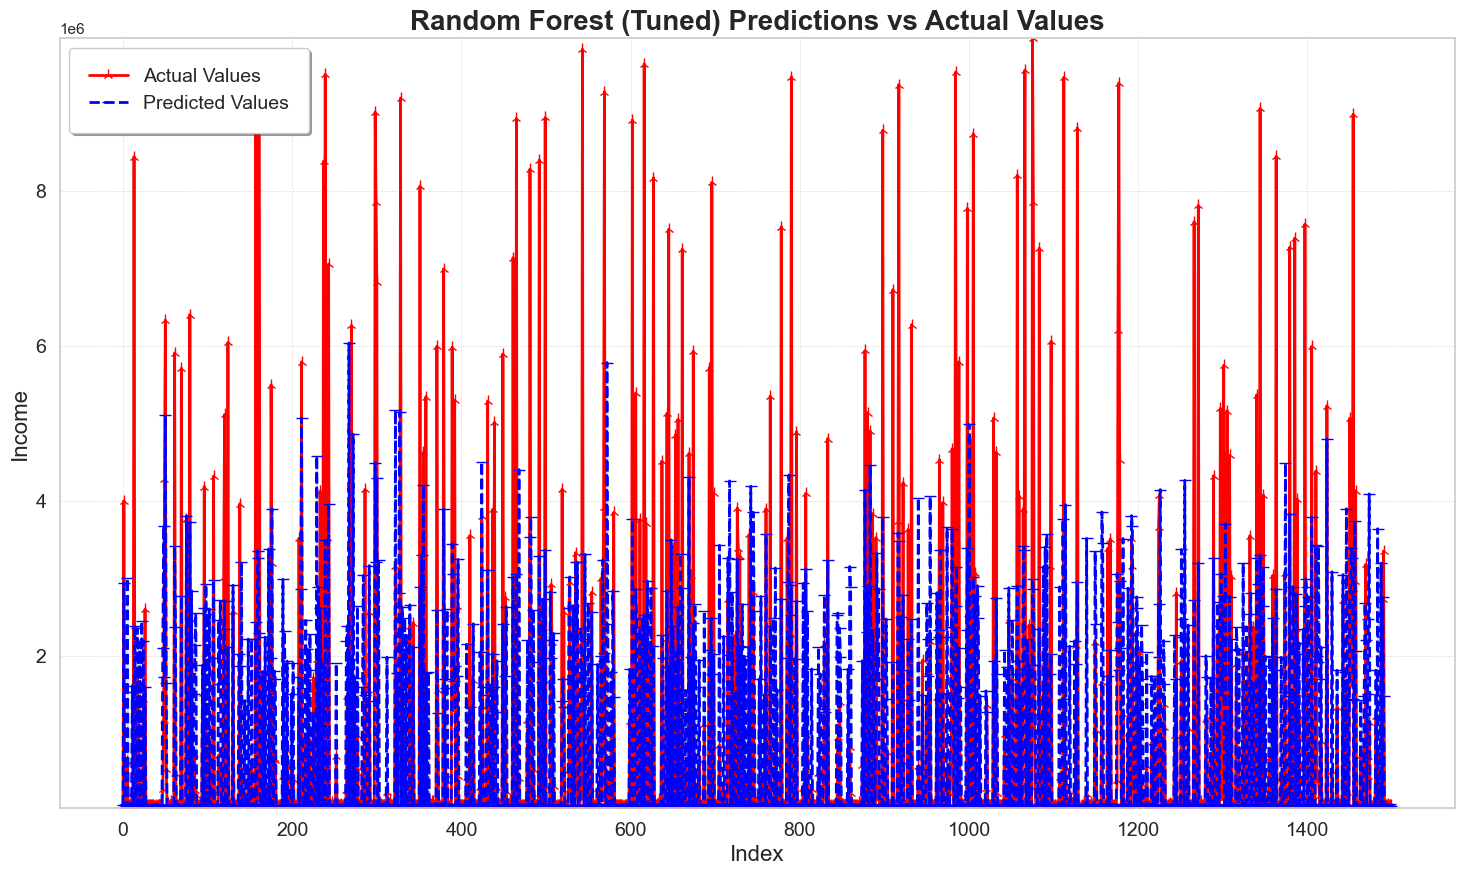

In [30]:
# Set the theme using seaborn
sns.set_theme(style="whitegrid", palette="muted")

# Improved plot for the predictions vs actual values for the best model after hyperparameter tuning
plt.figure(figsize=(18, 10))

# Plot actual values
plt.plot(y_test.values, label='Actual Values', color='red', linestyle='-', marker='2', markersize=8, linewidth=2)

# Plot predicted values
plt.plot(y_test_pred_param, label='Predicted Values', color='blue', linestyle='--', marker='_', markersize=8, linewidth=2)

# Fill between for better visualization of the prediction range
plt.fill_between(range(len(y_test)), y_test, y_test_pred_param, color='gray', alpha=0.2)

# Set the y-axis limits based on the min and max of y_test and y_test_pred_param
y_min = min(min(y_test), min(y_test_pred_param))
y_max = max(max(y_test), max(y_test_pred_param))
plt.ylim(y_min - 1, y_max + 1)

plt.xlabel('Index', fontsize=16)
plt.ylabel('Income', fontsize=16)
plt.title(f'{best_model_name_param} Predictions vs Actual Values', fontsize=20, fontweight='bold')
plt.legend(fontsize=14, loc='upper left', frameon=True, shadow=True, fancybox=True, borderpad=1)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()


In [31]:
# Deep Learning Model
def build_dl_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [32]:
# Build and train the Deep Learning Model
input_dim = X_train.shape[1]
dl_model = build_dl_model(input_dim)
start_time = time.time()
dl_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=2)
end_time = time.time()

d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
219/219 - 1s - 5ms/step - loss: 3936823279616.0000 - val_loss: 3930402324480.0000
Epoch 2/100
219/219 - 0s - 1ms/step - loss: 3934759944192.0000 - val_loss: 3925833416704.0000
Epoch 3/100
219/219 - 0s - 924us/step - loss: 3926473310208.0000 - val_loss: 3912998322176.0000
Epoch 4/100
219/219 - 0s - 922us/step - loss: 3908354179072.0000 - val_loss: 3888901521408.0000
Epoch 5/100
219/219 - 0s - 952us/step - loss: 3878779879424.0000 - val_loss: 3853189120000.0000
Epoch 6/100
219/219 - 0s - 946us/step - loss: 3837760372736.0000 - val_loss: 3805891526656.0000
Epoch 7/100
219/219 - 0s - 986us/step - loss: 3786060857344.0000 - val_loss: 3748155621376.0000
Epoch 8/100
219/219 - 0s - 912us/step - loss: 3725005160448.0000 - val_loss: 3681079263232.0000
Epoch 9/100
219/219 - 0s - 934us/step - loss: 3654722256896.0000 - val_loss: 3606732079104.0000
Epoch 10/100
219/219 - 0s - 936us/step - loss: 3577628590080.0000 - val_loss: 3527993982976.0000
Epoch 11/100
219/219 - 0s - 910us/step - lo

In [33]:
# Evaluate the deep learning model
y_val_pred_dl = dl_model.predict(X_val)
rmse_dl = mean_squared_error(y_val, y_val_pred_dl, squared=False)
mae_dl = mean_absolute_error(y_val, y_val_pred_dl)
r2_dl = r2_score(y_val, y_val_pred_dl)
metrics['Deep Learning Model'] = {'RMSE': rmse_dl, 'MAE': mae_dl, 'R^2': r2_dl, 'Time': end_time - start_time}
print(f'Deep Learning Model RMSE: {rmse_dl}, MAE: {mae_dl}, R^2: {r2_dl}, Time: {end_time - start_time} seconds')

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Deep Learning Model RMSE: 1421572.6905219741, MAE: 655253.8918128256, R^2: 0.3810243010520935, Time: 21.032519102096558 seconds


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [34]:
# Evaluate the deep learning model on the test set
y_test_pred_dl = dl_model.predict(X_test)
rmse_dl_test = mean_squared_error(y_test, y_test_pred_dl, squared=False)
mae_dl_test = mean_absolute_error(y_test, y_test_pred_dl)
r2_dl_test = r2_score(y_test, y_test_pred_dl)
print(f'Deep Learning Model Test RMSE: {rmse_dl_test}, MAE: {mae_dl_test}, R^2: {r2_dl_test}')

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step
Deep Learning Model Test RMSE: 1477160.5986094559, MAE: 700395.1427125651, R^2: 0.3782092332839966


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [35]:
# Prepare comparison metrics for the best base model, best hyperparameter-tuned model, and deep learning model

# Evaluate the best base model on the test set
y_test_pred_base = best_model_instance.predict(X_test)
rmse_test_base = mean_squared_error(y_test, y_test_pred_base, squared=False)
mae_test_base = mean_absolute_error(y_test, y_test_pred_base)
r2_test_base = r2_score(y_test, y_test_pred_base)

# Evaluate the best hyperparameter-tuned model on the test set
y_test_pred_param = best_model_instance_param.predict(X_test)
rmse_test_param = mean_squared_error(y_test, y_test_pred_param, squared=False)
mae_test_param = mean_absolute_error(y_test, y_test_pred_param)
r2_test_param = r2_score(y_test, y_test_pred_param)

# Evaluate the deep learning model on the test set
y_test_pred_dl = dl_model.predict(X_test)
rmse_dl_test = mean_squared_error(y_test, y_test_pred_dl, squared=False)
mae_dl_test = mean_absolute_error(y_test, y_test_pred_dl)
r2_dl_test = r2_score(y_test, y_test_pred_dl)

# Print metrics to debug
print("Best Base Model Time:", metrics[best_model_name]['Time'])
print("Best Tuned Model Time:", metrics_param[best_model_name_param]['Time'])
print("Deep Learning Model Time:", metrics['Deep Learning Model']['Time'])

d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
Best Base Model Time: 1.7799646854400635
Best Tuned Model Time: 125.57205724716187
Deep Learning Model Time: 21.032519102096558


d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\ESDS\Practice\Krish Nair\Incometric\vinc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [36]:
# Consolidate the metrics into a dataframe for easy manipulation
comparison_metrics = pd.DataFrame({
    'Model': ['Best Base Model (' + best_model_name + ')', 'Best Tuned Model (' + best_model_name_param + ')', 'Deep Learning Model'],
    'RMSE': [rmse_test_base, rmse_test_param, rmse_dl_test],
    'MAE': [mae_test_base, mae_test_param, mae_dl_test],
    'R^2': [r2_test_base, r2_test_param, r2_dl_test],
    'Time': [metrics[best_model_name]['Time'], metrics_param[best_model_name_param]['Time'], metrics['Deep Learning Model']['Time']]
})

# Check the dataframe structure
print(tabulate(comparison_metrics, headers='keys', tablefmt='rounded_grid', showindex="always"))

╭────┬──────────────────────────────────────────┬─────────────┬────────┬──────────┬───────────╮
│    │ Model                                    │        RMSE │    MAE │      R^2 │      Time │
├────┼──────────────────────────────────────────┼─────────────┼────────┼──────────┼───────────┤
│  0 │ Best Base Model (Random Forest)          │ 1.52854e+06 │ 697744 │ 0.334204 │   1.77996 │
├────┼──────────────────────────────────────────┼─────────────┼────────┼──────────┼───────────┤
│  1 │ Best Tuned Model (Random Forest (Tuned)) │ 1.47172e+06 │ 668171 │ 0.382781 │ 125.572   │
├────┼──────────────────────────────────────────┼─────────────┼────────┼──────────┼───────────┤
│  2 │ Deep Learning Model                      │ 1.47716e+06 │ 700395 │ 0.378209 │  21.0325  │
╰────┴──────────────────────────────────────────┴─────────────┴────────┴──────────┴───────────╯


In [37]:
# Normalize the metrics using MinMax scaling
scaler = MinMaxScaler()
normalized_metrics = scaler.fit_transform(comparison_metrics[['RMSE', 'MAE', 'R^2']])
normalized_df = pd.DataFrame(normalized_metrics, columns=['RMSE', 'MAE', 'R^2'], index=comparison_metrics.index)

# Assign weights to each metric
weights = {'RMSE': 0.4, 'MAE': 0.3, 'R^2': 0.3}

# Compute the weighted score for each model
normalized_df['Score'] = (
    weights['RMSE'] * (1 - normalized_df['RMSE']) +  # Lower RMSE is better, hence (1 - RMSE)
    weights['MAE'] * (1 - normalized_df['MAE']) +  # Lower MAE is better, hence (1 - MAE)
    weights['R^2'] * normalized_df['R^2']  # Higher R^2 is better
)

In [38]:
# Add the 'Score' column to the comparison_metrics DataFrame
comparison_metrics['Score'] = normalized_df['Score']

# Find the best model based on the highest score
best_model_idx = comparison_metrics['Score'].idxmax()
best_model_name = comparison_metrics.loc[best_model_idx, 'Model']
best_model_metrics = comparison_metrics.loc[best_model_idx]

# Print the comparison table
print("\nComparison of Best Base Model, Best Tuned Model, and Deep Learning Model:")
print(tabulate(comparison_metrics, headers="keys", tablefmt="grid"))


Comparison of Best Base Model, Best Tuned Model, and Deep Learning Model:
+----+------------------------------------------+-------------+--------+----------+-----------+-----------+
|    | Model                                    |        RMSE |    MAE |      R^2 |      Time |     Score |
+====+==========================================+=============+========+==========+===========+===========+
|  0 | Best Base Model (Random Forest)          | 1.52854e+06 | 697744 | 0.334204 |   1.77996 | 0.0246782 |
+----+------------------------------------------+-------------+--------+----------+-----------+-----------+
|  1 | Best Tuned Model (Random Forest (Tuned)) | 1.47172e+06 | 668171 | 0.382781 | 125.572   | 1         |
+----+------------------------------------------+-------------+--------+----------+-----------+-----------+
|  2 | Deep Learning Model                      | 1.47716e+06 | 700395 | 0.378209 |  21.0325  | 0.63347   |
+----+------------------------------------------+------------

In [39]:
# Print the best overall model metrics
best_model_table = [
    ["Metric", "Value"],
    ["Best Overall Model", best_model_name],
    ["RMSE", f"{best_model_metrics['RMSE']:.3f}"],
    ["MAE", f"{best_model_metrics['MAE']:.3f}"],
    ["R^2", f"{best_model_metrics['R^2']:.3f}"],
    ["Time (seconds)", f"{best_model_metrics['Time']:.4f}"],
    ["Score", f"{best_model_metrics['Score']:.3f}"]
]
print("\nBest Overall Model Metrics:")
print(tabulate(best_model_table, headers="firstrow", tablefmt="grid"))



Best Overall Model Metrics:
+--------------------+------------------------------------------+
| Metric             | Value                                    |
+====================+==========================================+
| Best Overall Model | Best Tuned Model (Random Forest (Tuned)) |
+--------------------+------------------------------------------+
| RMSE               | 1471720.489                              |
+--------------------+------------------------------------------+
| MAE                | 668170.950                               |
+--------------------+------------------------------------------+
| R^2                | 0.383                                    |
+--------------------+------------------------------------------+
| Time (seconds)     | 125.5721                                 |
+--------------------+------------------------------------------+
| Score              | 1.000                                    |
+--------------------+-------------------------

In [40]:
# Calculate percentage improvement
comparison_metrics['Efficiency'] = (comparison_metrics['Score'] / comparison_metrics['Score'].sum()) * 100
comparison_metrics['Improvement'] = comparison_metrics['Score'].pct_change().fillna(0) * 100

# Print the efficiency and improvement table
efficiency_table = comparison_metrics[['Model', 'Efficiency', 'Improvement']]
print("\nEfficiency and Improvement Comparison:")
print(tabulate(efficiency_table, headers="keys", tablefmt="grid"))


Efficiency and Improvement Comparison:
+----+------------------------------------------+--------------+---------------+
|    | Model                                    |   Efficiency |   Improvement |
+====+==========================================+==============+===============+
|  0 | Best Base Model (Random Forest)          |       1.4883 |         0     |
+----+------------------------------------------+--------------+---------------+
|  1 | Best Tuned Model (Random Forest (Tuned)) |      60.3083 |      3952.15  |
+----+------------------------------------------+--------------+---------------+
|  2 | Deep Learning Model                      |      38.2034 |       -36.653 |
+----+------------------------------------------+--------------+---------------+


In [41]:
# Highlight the best model based on efficiency
best_model_efficiency_idx = comparison_metrics['Efficiency'].idxmax()
best_model_efficiency_name = comparison_metrics.loc[best_model_efficiency_idx, 'Model']
best_model_efficiency_metrics = comparison_metrics.loc[best_model_efficiency_idx]

# Print the best model based on efficiency
best_model_efficiency_table = [
    ["Metric", "Value"],
    ["Best Model by Efficiency", best_model_efficiency_name],
    ["Efficiency (%)", f"{best_model_efficiency_metrics['Efficiency']:.2f}"],
    ["Improvement (%)", f"{best_model_efficiency_metrics['Improvement']:.2f}"]
]
print("\nBest Model by Efficiency Metrics:")
print(tabulate(best_model_efficiency_table, headers="firstrow", tablefmt="grid"))


Best Model by Efficiency Metrics:
+--------------------------+------------------------------------------+
| Metric                   | Value                                    |
+==========================+==========================================+
| Best Model by Efficiency | Best Tuned Model (Random Forest (Tuned)) |
+--------------------------+------------------------------------------+
| Efficiency (%)           | 60.31                                    |
+--------------------------+------------------------------------------+
| Improvement (%)          | 3952.15                                  |
+--------------------------+------------------------------------------+


In [42]:
# Save the best overall model (based on score) to a file
best_model_instance = best_models[best_model_name.split('(')[1].split(')')[0].strip()]
best_model_instance

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=300, random_state=6112024)

In [43]:
"""
import pickle
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model_instance, file)
"""

"\nimport pickle\nwith open('best_model.pkl', 'wb') as file:\n    pickle.dump(best_model_instance, file)\n"